In [5]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
import sys
# sys.path.append("../analysis")
sys.path.append("../..")
from cmap import build_phipsi, extend_phipsi, compute_pdf_r


import mdtraj as mdt


In [6]:
basepath = "/data/gzappavigna/lmp_conf_builder/runs/"
ens_traj = mdt.load(basepath + "ensemble.xtc", top=basepath + "cg.pdb")

/home/gzappavigna/miniforge3/envs/lab/lib/python3.12/site-packages/mdtraj/formats/pdb/pdbfile.py:206: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


In [27]:
ens_phipsi = build_phipsi(ens_traj)
ext_ens_phipsi = [extend_phipsi(phipsi, 0.4) for phipsi in ens_phipsi]


In [28]:
glys = [res for res in ens_traj.topology.residues if res.name == "GLY"]

In [31]:
res = glys[2]

pdf, angles = compute_pdf_r(ext_ens_phipsi[res.index], 150, 1)


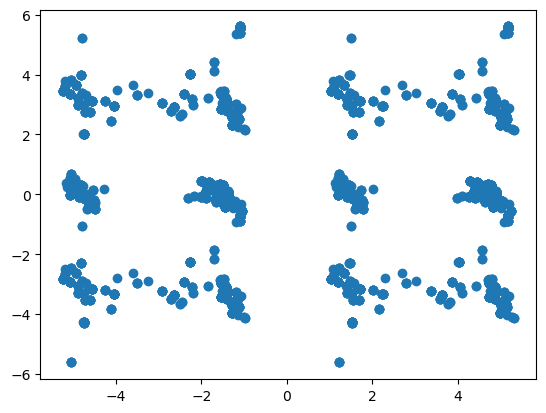

In [32]:
plt.scatter(ext_ens_phipsi[res.index][:, 0], ext_ens_phipsi[res.index][:, 1])

Text(0.5, 1.0, 'Gly')

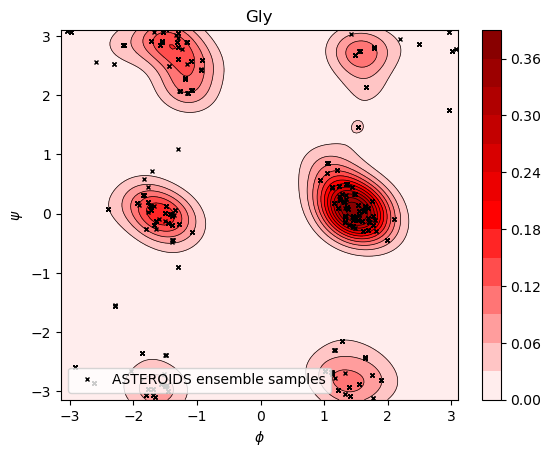

In [82]:
ctf = plt.contourf(angles, angles, pdf.T, levels=14, cmap="seismic", norm=colors.CenteredNorm())
plt.contour(angles, angles, pdf.T, levels=ctf.levels[1:], linewidths=0.5, colors='k')
plt.colorbar(ctf)

xlim = plt.xlim()
ylim = plt.ylim()

plt.plot(ens_phipsi[res.index, :, 0], ens_phipsi[res.index, :, 1], 'kx', ms=3, label="ASTEROIDS ensemble samples")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(r"$\phi$")
plt.ylabel(r"$\psi$")
plt.legend()# bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", borderaxespad=0) # ncol=3)
plt.title("Gly")


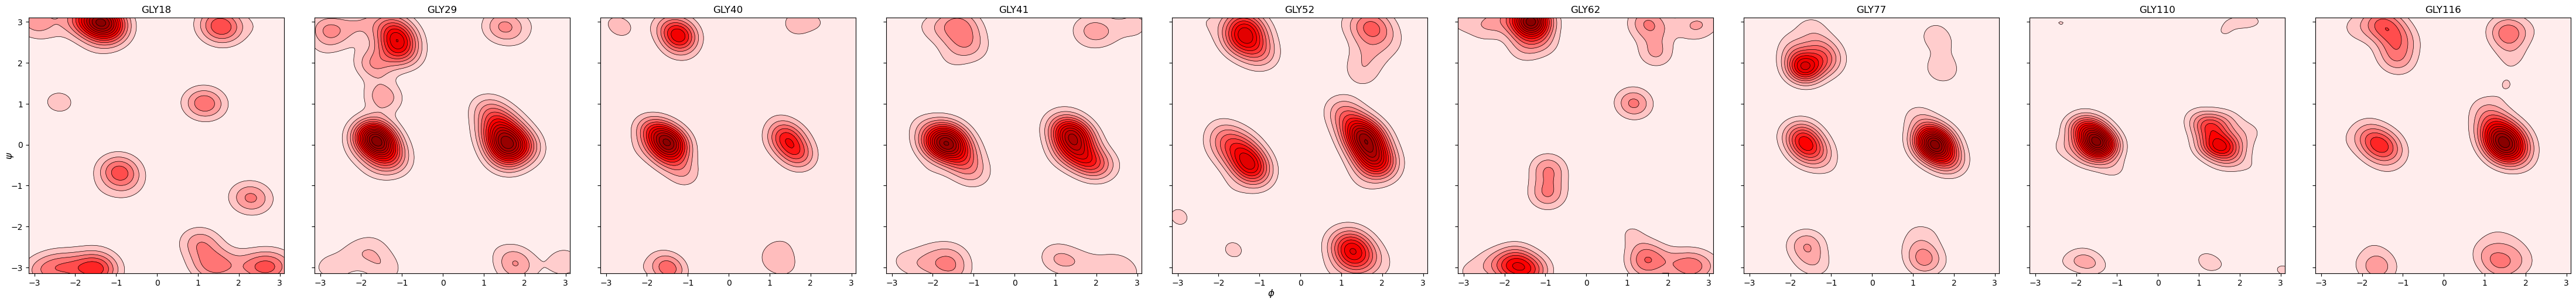

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=len(glys), figsize=(5* len(glys), 5), sharey=True, sharex=True)

for ax, res in zip(axes, glys):
    pdf, angles = compute_pdf_r(ext_ens_phipsi[res.index], 150, 1)

    ctf = ax.contourf(angles, angles, pdf.T, levels=14, cmap="seismic", norm=colors.CenteredNorm())
    # ax.set_colorbar(ctf)
    ax.set_aspect("equal")
    # ax.set_axis_off()
    ax.contour(angles, angles, pdf.T, levels=ctf.levels[1:], linewidths=0.5, colors='k')
    ax.set_title(f"{res.name}{res.resSeq}")

fig.supxlabel(r"$\phi$")
fig.supylabel(r"$\psi$")
# fig.suptitle("Gly residues")
fig.tight_layout()
plt.subplots_adjust(left=0.025)

In [35]:
pdf.mean()

0.023709253970573444

In [36]:
from scipy.integrate import simpson

simpson(simpson(pdf, x=angles), x=angles)

0.928926388973846

In [107]:
ext_ens_phipsis =[]

for phipsi in ens_phipsi:
    ext_ens_phipsis.append(extend_phipsi(phipsi, 0.3))

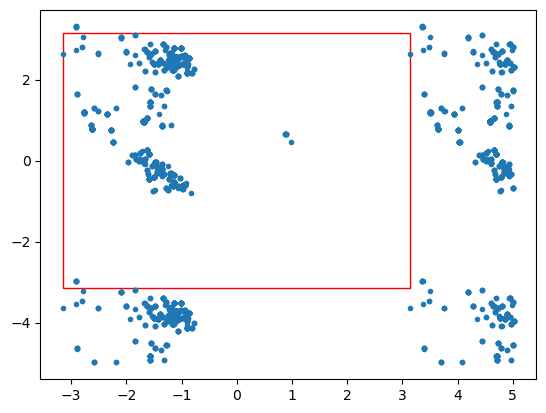

In [38]:
phipsi = ext_ens_phipsis[15]

plt.plot(phipsi[:, 0], phipsi[:, 1], '.')

rect = patches.Rectangle((-np.pi, -np.pi), 2 * np.pi, 2 * np.pi, linewidth=1, edgecolor='r', facecolor='none')

ax = plt.gca()
ax.add_patch(rect)